<a href="https://colab.research.google.com/github/Abhiji-th/edema-ards-classification/blob/main/swin_tiny_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
def load_data(image_size, labels, base_path):
    X = []
    Y = []
    for label in labels:
        folderPath = os.path.join(base_path, label)
        for img_name in os.listdir(folderPath):
            img_path = os.path.join(folderPath, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append(labels.index(label))
    return X, Y

In [5]:
image_size = 224
BATCH_SIZE = 32
NUM_CLASSES = 2
labels = ['covid', 'pneumonia']
base_path = '/content/drive/MyDrive/covid_pneumonia/'

# Load data
X, Y = load_data(image_size, labels, base_path)

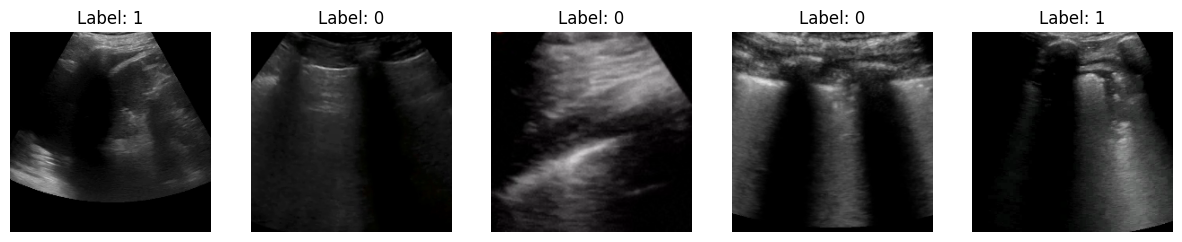

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Function to display random 5 images with labels
def show_random_images(X, Y, num_images=5):
    indices = random.sample(range(len(X)), num_images)  # Select random indices
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Create subplots

    for i, idx in enumerate(indices):
        axes[i].imshow(X[idx])  # Show image
        axes[i].set_title(f"Label: {Y[idx]}")  # Set label as title
        axes[i].axis("off")  # Hide axes

    plt.show()

# Call the function
show_random_images(X, Y)


In [8]:
# Step 1: Split into train + validation_temp and test
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 2: Split validation_temp into validation and test
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

In [1]:
from transformers import TFSwinForImageClassification, SwinConfig
import tensorflow as tf

# Load the pre-trained Swin Transformer Tiny model
config = SwinConfig.from_pretrained("microsoft/swin-tiny-patch4-window7-224", num_labels=NUM_CLASSES)
model = TFSwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224", config=config)

# Create a dummy input (batch size 1, 3 channels, 224x224 image)
dummy_input = tf.random.uniform((1, 3, 224, 224))

# Forward pass
outputs = model(dummy_input)
print(outputs.logits)  # Output classification logits


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFSwinForImageClassification.

All the weights of TFSwinForImageClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFSwinForImageClassification for predictions without further training.


tf.Tensor(
[[-1.15465231e-01  4.18323219e-01  3.51298720e-01  4.66220677e-01
   4.93999034e-01  1.45063147e-01  3.79716784e-01 -6.17918000e-02
  -6.65756017e-02  1.37727395e-01  4.46598977e-02 -8.33302736e-02
   9.90621448e-02  1.52987584e-01  1.17177293e-01  5.15370071e-02
   2.07461566e-02 -9.27859768e-02  1.11153007e-01 -7.60398358e-02
   1.90532416e-01  5.10193229e-01  1.19834825e-01  3.33060622e-01
  -1.01709217e-01 -1.58306897e-01  1.21311620e-02 -2.81614065e-02
   9.75528359e-02  3.18694651e-01  7.74090439e-02  1.04583427e-01
   8.86849985e-02  5.61934225e-02  2.17382342e-01  4.58985567e-04
  -4.85327095e-03 -1.11326709e-01  1.05033264e-01 -1.47727922e-01
   9.86584425e-02 -1.57475367e-01  3.41885835e-02 -2.52908468e-03
  -2.37763464e-01 -9.60316360e-02  1.29157990e-01 -7.26868063e-02
  -1.70550659e-01 -1.78765655e-02 -3.49746495e-02 -1.65190622e-01
   9.32461843e-02 -6.31453991e-02 -2.61637196e-02  3.64203155e-02
  -8.06983188e-02  5.76089323e-02  4.83718246e-01  3.13444585e-01